<a href="https://colab.research.google.com/github/rk119/F20DL-Group14-Submissions/blob/main/Coursework_Secondary_Dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Additional Exploration of a Text-Based Credit Card Dataset

##Imports

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.naive_bayes import GaussianNB, MultinomialNB, ComplementNB, BernoulliNB, CategoricalNB
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import classification_report, accuracy_score, roc_auc_score, roc_curve, auc
from sklearn.neighbors import KNeighborsClassifier




---


##Quantitative Data Analysis


---





In [ ]:
# Load the dataset
df = pd.read_csv('/content/drive/MyDrive/F20DL_Data/Secondary Dataset/creditcard.csv')

# Display the first few rows of the dataset
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [ ]:
# Divide the dataset into train and test
train_df, test_df = train_test_split(df, test_size=0.2, random_state=42)

# Further divide the train dataset into x_train and y_train
x_train = train_df.drop(columns=['Class'])
y_train = train_df['Class']

x_train.shape, y_train.shape

((227845, 30), (227845,))

In [ ]:
# Basic statistics of the training dataset
train_stats = x_train.describe()

train_stats

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
count,227845.000000,227845.000000,227845.000000,227845.000000,227845.000000,227845.000000,227845.000000,227845.000000,227845.000000,227845.000000,...,227845.000000,227845.000000,227845.000000,227845.000000,227845.000000,227845.000000,227845.000000,227845.000000,227845.000000,227845.000000
mean,94792.551673,0.000916,-0.000384,-0.000920,-0.001458,0.000997,-0.000613,0.001090,-0.000383,0.000961,...,0.000398,0.000215,-0.001215,0.000175,-0.000217,-0.000979,-0.000192,-0.000032,0.000257,88.479993
std,47488.471663,1.958337,1.656602,1.514545,1.415853,1.387667,1.336803,1.243493,1.188643,1.097553,...,0.774045,0.732617,0.725311,0.627103,0.605446,0.521764,0.482443,0.401821,0.329776,254.930277
min,0.000000,-56.407510,-72.715728,-48.325589,-5.683171,-113.743307,-26.160506,-43.557242,-73.216718,-13.320155,...,-54.497720,-34.830382,-10.933144,-44.807735,-2.836627,-10.295397,-2.604551,-9.895244,-15.430084,0.000000
25%,54161.000000,-0.919918,-0.597971,-0.890786,-0.849270,-0.688802,-0.768573,-0.552156,-0.208431,-0.642386,...,-0.211969,-0.228730,-0.542809,-0.161296,-0.354887,-0.317835,-0.327476,-0.070960,-0.052980,5.600000
50%,84707.000000,0.017978,0.066050,0.179041,-0.020959,-0.054711,-0.274846,0.041272,0.022233,-0.050414,...,-0.062614,-0.029639,0.005491,-0.010595,0.040766,0.015101,-0.052011,0.001359,0.011366,22.000000
75%,139305.000000,1.315548,0.803898,1.025399,0.741630,0.611173,0.396056,0.570639,0.327504,0.599040,...,0.133017,0.186080,0.527408,0.148202,0.439790,0.350453,0.240813,0.091400,0.078464,77.100000
max,172792.000000,2.454930,22.057729,4.187811,16.875344,34.801666,73.301626,120.589494,20.007208,10.392889,...,39.420904,27.202839,10.503090,22.528412,4.584549,7.519589,3.517346,31.612198,33.847808,25691.160000




---


##EDA(Exploratory Data Analysis):


---


For this EDA, We will be going over

1.   Exploring the statistic of the dataset
2.   Distribution of the target class and features
3.   Correlation Analysis
4.   Performing PCA on the dataset for better feature extraction





####We can say that the features in the data(V1-V28) are standardized because they have a mean close to 0 and a standard deviation close to 1
####Since the median of "Amount" is smaller than the mean, it suggests that the data is positively skewed. It indicates multiple smaller transactions and a few rare big ones.

In [ ]:
# Basic statistics of the training dataset
train_stats = x_train.describe()

train_stats

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
count,227845.000000,227845.000000,227845.000000,227845.000000,227845.000000,227845.000000,227845.000000,227845.000000,227845.000000,227845.000000,...,227845.000000,227845.000000,227845.000000,227845.000000,227845.000000,227845.000000,227845.000000,227845.000000,227845.000000,227845.000000
mean,94792.551673,0.000916,-0.000384,-0.000920,-0.001458,0.000997,-0.000613,0.001090,-0.000383,0.000961,...,0.000398,0.000215,-0.001215,0.000175,-0.000217,-0.000979,-0.000192,-0.000032,0.000257,88.479993
std,47488.471663,1.958337,1.656602,1.514545,1.415853,1.387667,1.336803,1.243493,1.188643,1.097553,...,0.774045,0.732617,0.725311,0.627103,0.605446,0.521764,0.482443,0.401821,0.329776,254.930277
min,0.000000,-56.407510,-72.715728,-48.325589,-5.683171,-113.743307,-26.160506,-43.557242,-73.216718,-13.320155,...,-54.497720,-34.830382,-10.933144,-44.807735,-2.836627,-10.295397,-2.604551,-9.895244,-15.430084,0.000000
25%,54161.000000,-0.919918,-0.597971,-0.890786,-0.849270,-0.688802,-0.768573,-0.552156,-0.208431,-0.642386,...,-0.211969,-0.228730,-0.542809,-0.161296,-0.354887,-0.317835,-0.327476,-0.070960,-0.052980,5.600000
50%,84707.000000,0.017978,0.066050,0.179041,-0.020959,-0.054711,-0.274846,0.041272,0.022233,-0.050414,...,-0.062614,-0.029639,0.005491,-0.010595,0.040766,0.015101,-0.052011,0.001359,0.011366,22.000000
75%,139305.000000,1.315548,0.803898,1.025399,0.741630,0.611173,0.396056,0.570639,0.327504,0.599040,...,0.133017,0.186080,0.527408,0.148202,0.439790,0.350453,0.240813,0.091400,0.078464,77.100000
max,172792.000000,2.454930,22.057729,4.187811,16.875344,34.801666,73.301626,120.589494,20.007208,10.392889,...,39.420904,27.202839,10.503090,22.528412,4.584549,7.519589,3.517346,31.612198,33.847808,25691.160000


###Showing how the data is distributed for each class. Noticing a heavy imbalance

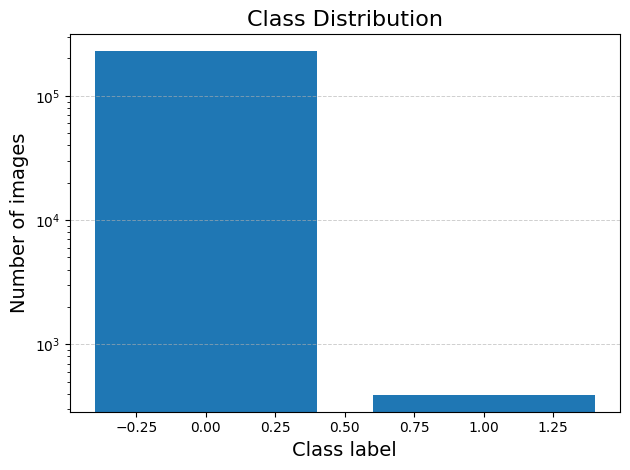

In [ ]:
# Distribution of the target variable (Class)
class_distribution = y_train.value_counts()

plt.bar([class_distribution.keys()[0],class_distribution.keys()[1]], [class_distribution[0],class_distribution[1]]) # Plotting the histogram

plt.title("Class Distribution", fontsize=16)
plt.xlabel("Class label", fontsize=14)
plt.ylabel("Number of images", fontsize=14)

plt.grid(axis='y', linestyle='--', linewidth=0.7, alpha=0.6)
plt.yscale('log')
plt.tight_layout()
plt.show()

###Plotting the distribution of transaction amounts to confirm the previous assumption

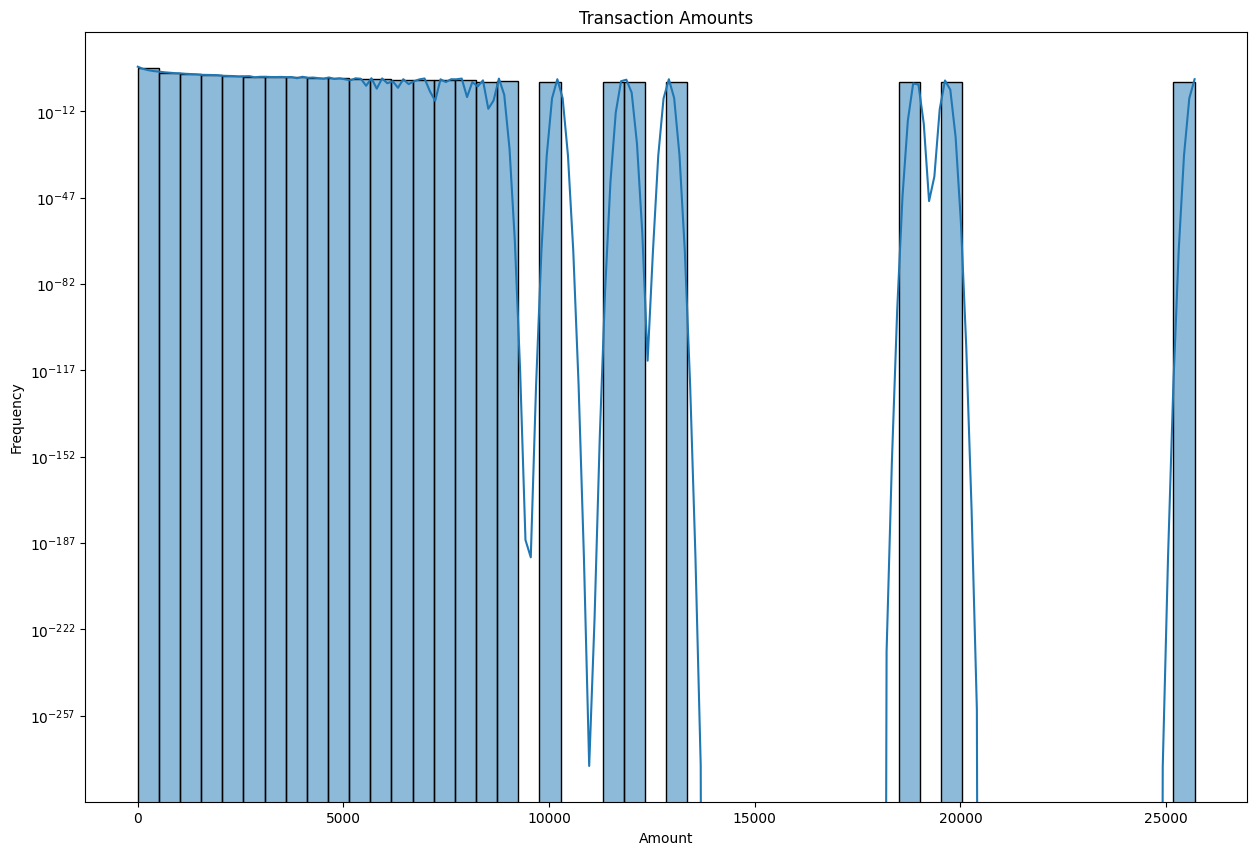

In [ ]:
plt.figure(figsize=(15, 10))
sns.histplot(x_train['Amount'], bins=50, kde=True)
plt.title('Transaction Amounts')
plt.xlabel('Amount')
plt.ylabel('Frequency')
plt.yscale('log')
plt.show()

This shows that majority of the transaction amounts are smaller amounts

###Correlation Matrix to understand and explore any correlations between the features and target class

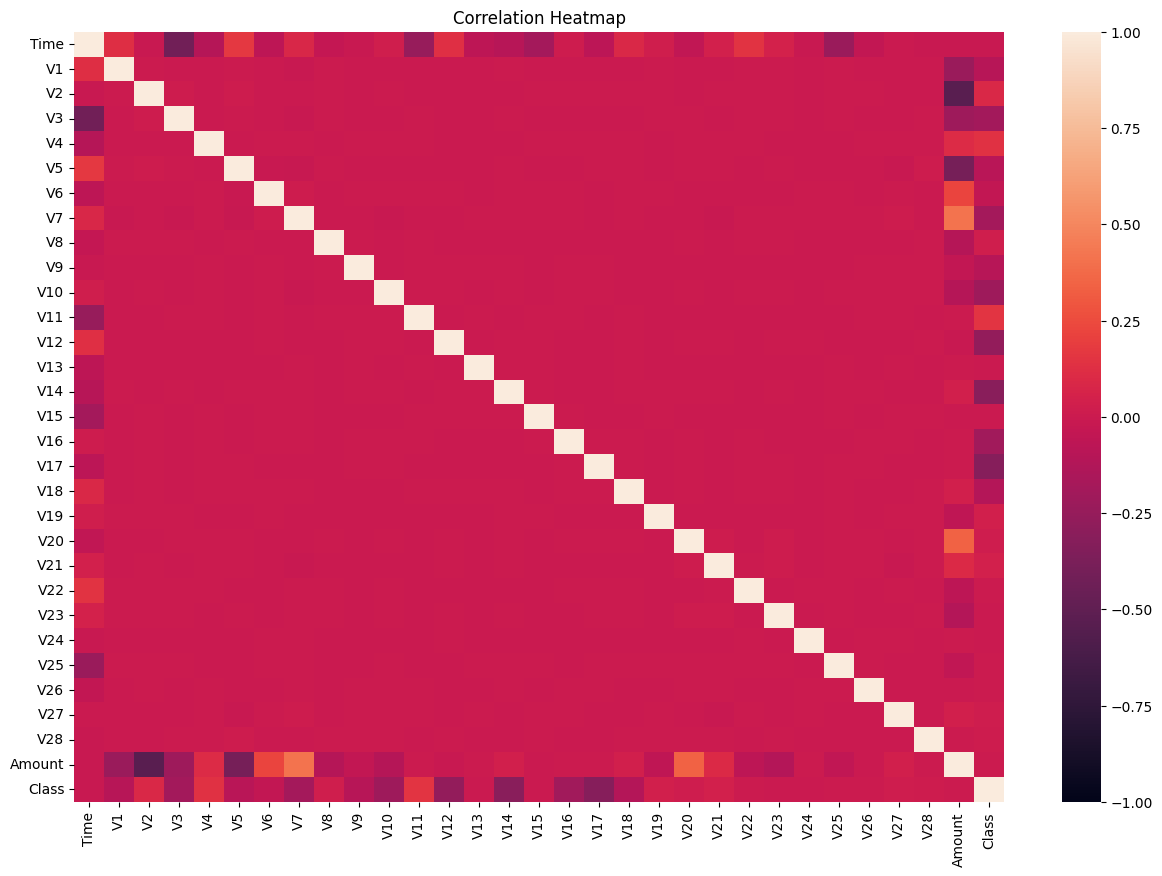

In [ ]:
correlation_matrix = train_df.corr()

plt.figure(figsize=(15, 10))
sns.heatmap(correlation_matrix, vmin=-1, vmax=1)
plt.title('Correlation Heatmap')
plt.show()

1.   The features have very low correlation with each other.
2.   "Time" feature has some lower correlations with the other features.
3.   "Amount" feature has somewhat correlation with the other features
      but certain features correlate with it higher than the others.






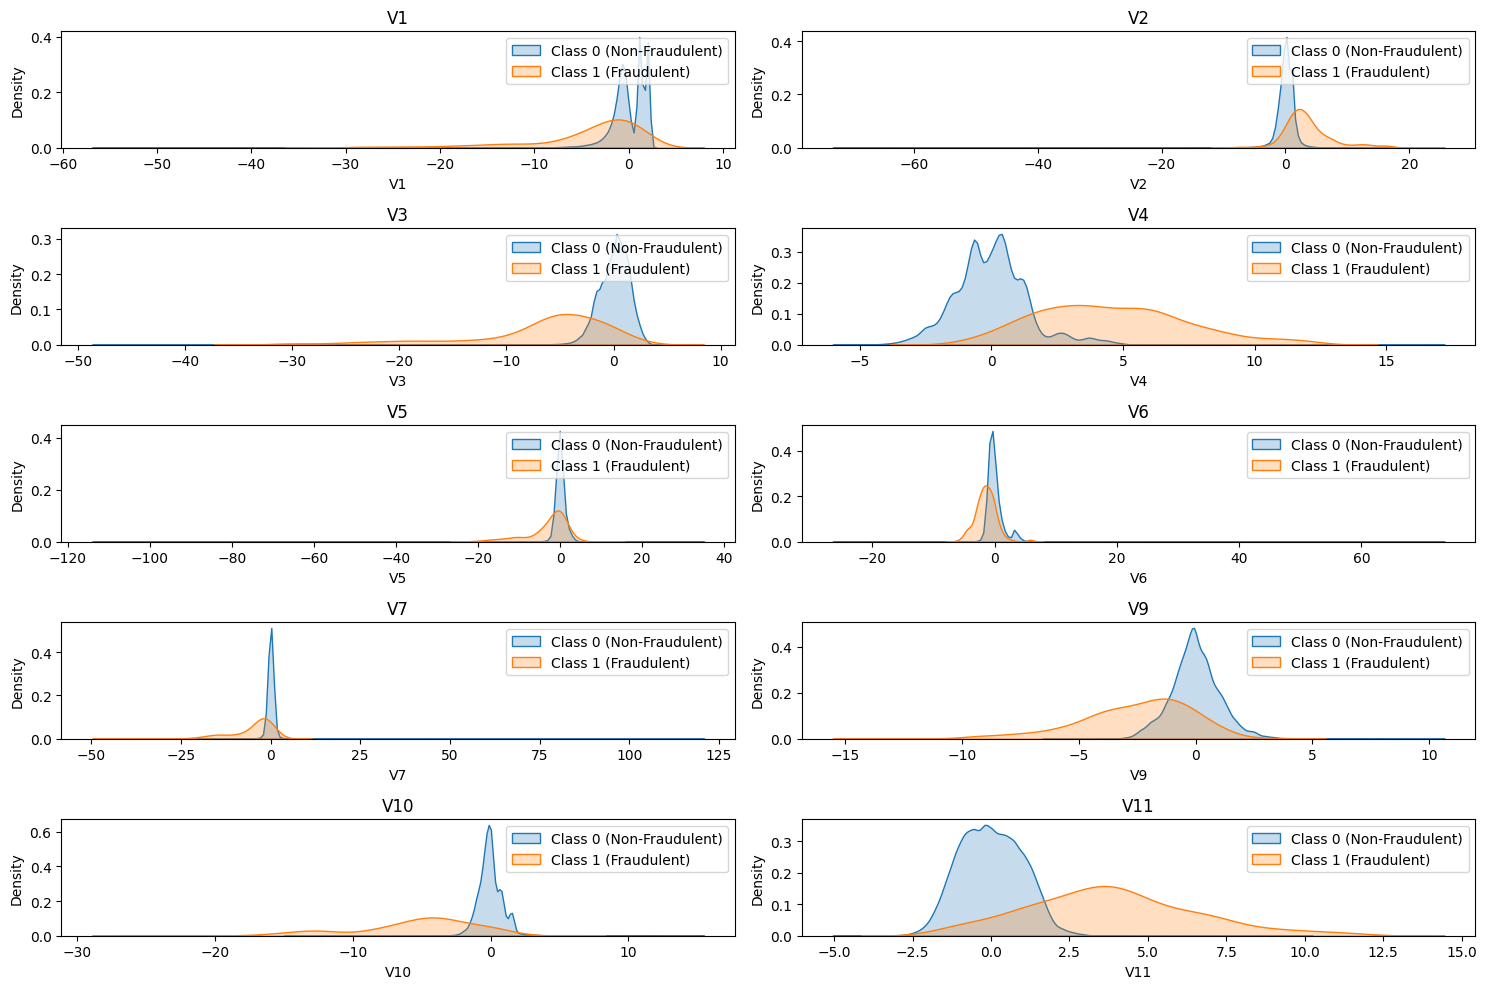

In [ ]:
plt.figure(figsize=(15, 10))

for i, feature in enumerate(selected_features, 1):
    plt.subplot(5, 2, i)
    sns.kdeplot(x_train[y_train == 0][feature], label='Class 0 (Non-Fraudulent)', fill=True)
    sns.kdeplot(x_train[y_train == 1][feature], label='Class 1 (Fraudulent)', fill=True)
    plt.title(feature)
    plt.legend()

plt.tight_layout()
plt.show()

We can see here that some features correlate with the underreprented class(Fraudulent) more than others



---


##Running a Naive Bayes Classifier on the dataset

---



###Running Gaussian Naive Bayes Classifier on the dataset with all the features

In [ ]:
#Train test split stuff (to be cleaned up)
x_train_split, x_test_split, y_train_split, y_test_split = train_test_split(x_train, y_train, stratify=y_train ,test_size=0.2, shuffle=True ,random_state=42)

gnb = GaussianNB()
gnb.fit(x_train,y_train.values.ravel())
y_pred=gnb.predict(x_test_split)
y_pred_probab=gnb.predict_proba(x_test_split)
print(classification_report(y_test_split,y_pred))
print("Accuracy: ", accuracy_score(y_test_split, y_pred))

              precision    recall  f1-score   support

           0       1.00      0.99      1.00     45490
           1       0.17      0.71      0.28        79

    accuracy                           0.99     45569
   macro avg       0.59      0.85      0.64     45569
weighted avg       1.00      0.99      1.00     45569

Accuracy:  0.9935482455177862


In [ ]:
# Performing cross-validation with 10 folds
cross_validation = cross_val_score(gnb, x_train_split, y_train_split.values.ravel(), cv=10)

# Displaying the results of cross-validation
print("Cross Validation Scores: ", cross_validation )
print("\nCross Validation Mean: ", cross_validation.mean())

Cross Validation Scores:  [0.99242923 0.9935813  0.99210007 0.99325214 0.9935813  0.99434935
 0.99292259 0.99374554 0.9933615  0.99352609]

Cross Validation Mean:  0.993284910882785


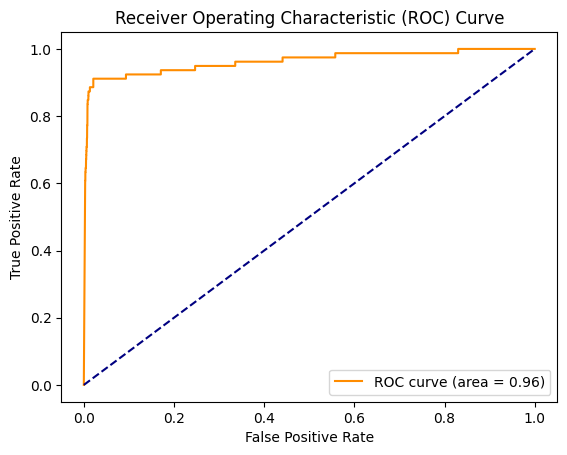

In [ ]:
fpr, tpr, thresholds = roc_curve(y_test_split, y_pred_probab[:,1])
roc_auc = auc(fpr, tpr)
plt.figure()
plt.plot(fpr, tpr, color='darkorange', label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

###Selecting the top 10 correlating features and running a Gaussian Naive Bayes Classifier using them

In [ ]:
corr_mat = x_train.corr()
new_data = corr_mat['Amount']
new_data_topcorr = new_data.sort_values(ascending=False, key=abs)[1:].head(10)
new_data_topcorr_features = new_data_topcorr.keys().tolist()
new_data_topcorr_features

['V2', 'V7', 'V5', 'V20', 'V1', 'V6', 'V3', 'V23', 'V8', 'V10']

In [ ]:
x_train_split_top_feature, x_test_split_top_feature, y_train_split_top_feature, y_test_split_top_feature = train_test_split(x_train[new_data_topcorr_features], y_train, stratify=y_train ,test_size=0.2, shuffle=True ,random_state=42)
gnb_topcorr = GaussianNB()
gnb_topcorr.fit(x_train,y_train.values.ravel())
y_pred_top_feature = gnb_topcorr.predict(x_test_split)
y_pred_probab_top_feature = gnb_topcorr.predict_proba(x_test_split)
print(classification_report(y_test_split,y_pred))
print("Accuracy: ", accuracy_score(y_test_split, y_pred))

              precision    recall  f1-score   support

           0       1.00      0.99      1.00     45490
           1       0.17      0.71      0.28        79

    accuracy                           0.99     45569
   macro avg       0.59      0.85      0.64     45569
weighted avg       1.00      0.99      1.00     45569

Accuracy:  0.9935482455177862


In [ ]:
# Performing cross-validation with 10 folds
cross_validation = cross_val_score(gnb_topcorr, x_train_split_top_feature, y_train_split_top_feature.values.ravel(), cv=10)

# Displaying the results of cross-validation
print("Cross Validation Scores: ", cross_validation )
print("\nCross Validation Mean: ", cross_validation.mean())

Cross Validation Scores:  [0.97267939 0.97662936 0.97273425 0.9744898  0.9747641  0.97597103
 0.97525649 0.97383003 0.97531135 0.97531135]

Cross Validation Mean:  0.9746977162015721


The high imbalance causes the low cross validation accuracy

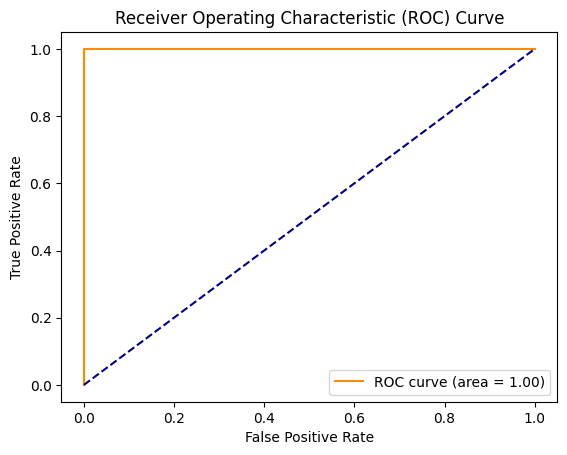

In [ ]:
fpr, tpr, thresholds = roc_curve(y_pred_top_feature, y_pred_probab_top_feature[:,1])
roc_auc = auc(fpr, tpr)
plt.figure()
plt.plot(fpr, tpr, color='darkorange', label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

There is a low false positive rate, which is important in credit card fraud detection as flagging the wrong transactions is inconvenient and costly.
This also may indicate potential overfitting of the model in the given data.

In [ ]:
clf_knn = KNeighborsClassifier()

clf_knn.fit(x_train, y_train.values.ravel())
y_pred = clf_knn.predict(x_test_split)
test_score = clf_knn.score(x_test_split, y_test_split)

print(test_score)

0.9984199784941518
